#### Equipo 11    Grupo : 003 (VIERNES 6p.m - 9 p.m)
#### Integrantes:
#### 1809285 DÍAZ TALAMANTES PERLA MILLET
#### 1819111 HERNÁNDEZ BOLAÑOS LESLYE MARISOL
#### 1824073 SOUSA RIVERA JUAN ANTONIO

# Título:

- Base de datos principal: Informe mundial sobre la felicidad

Url de la página: https://www.kaggle.com/unsdsn/world-happiness

- Base de datos de apoyo: GDP per capita 2016

Url de la página: https://ourworldindata.org/economic-growth

- Importación de librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import conda
import random
import plotly.graph_objects as go
import scipy.stats as stt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

Populating the interactive namespace from numpy and matplotlib


# Descripción de los datos:

Nuestros datos originales están compuestos por una base de datos que hace referencia al año 2016, y cuenta con 157 datos con las siguientes columnas: Country,  Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual.

Como lo mencionamos anteriormente la tabla está compuesta por 13 columnas, cada una de ellas tiene el promedio de la respuesta obtenida a través de una encuesta, cada una de estas columnas describen en qué medida estos factores contribuyen cada variable, representada por el encabezado de cada columna para cada país y región, estas medidas están en un rango del 0-10, siendo el 0 lo que causa menor felicidad y el 10 como máxima felicidad.

Como complemento utilizaremos una base de datos que contiene el per Cápita de diferentes países del año 2016.

- A continuación, iniciaremos utilizando la librería pandas para poder leer nuestros archivos.

In [2]:
df_2016= pd.read_csv("2016.csv")
df_per_capita= pd.read_csv("per capita.csv")
df_paises= pd.read_csv("PaisesCapitales.csv")

- Ahora visualizaremos nuestras bases de datos

In [3]:
print("\n\nTabla del 2016:\n")
df_2016



Tabla del 2016:



,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [4]:
print("\n\nTabla del per Cápita del 2016")
df_per_capita



Tabla del per Cápita del 2016


,Entity,Code,Year,"Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018))"
0,Afghanistan,AFG,2016,1929.0
1,Albania,ALB,2016,10342.0
2,Algeria,DZA,2016,14331.0
3,Angola,AGO,2016,8453.0
4,Argentina,ARG,2016,18875.0
...,...,...,...,...
161,Venezuela,VEN,2016,15219.0
162,Vietnam,VNM,2016,6062.0
163,Yemen,YEM,2016,2506.0
164,Zambia,ZMB,2016,3479.0


- Los tipos de datos que tienen las bases de datos son los siguientes

In [5]:
print("\nTipo de datos de la tabla del 2016:\n")
df_2016.dtypes


Tipo de datos de la tabla del 2016:



Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
print("\nTipo de datos de la tabla del per Cápita del 2016:\n")
df_per_capita.dtypes


Tipo de datos de la tabla del per Cápita del 2016:



Entity                                                                                  object
Code                                                                                    object
Year                                                                                     int64
 Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018))     float64
dtype: object

- Tamaño de las bases de datos

In [7]:
print("Tamaño tabla de 2016: ", df_2016.shape)
print("\nTamaño tabla del per Cápita de 2016:", df_per_capita.shape)

Tamaño tabla de 2016:  (157, 13)

Tamaño tabla del per Cápita de 2016: (166, 4)


- Columnas de las bases de datos

In [8]:
print("\nColumnas de la tabla de 2016\n", df_2016.columns)
print("\nColumnas de la tabla del per Cápita de 2016\n", df_per_capita.columns)


Columnas de la tabla de 2016
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

Columnas de la tabla del per Cápita de 2016
 Index(['Entity', 'Code', 'Year',
       ' Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018)) '],
      dtype='object')


# Justificación de los datos:

En cuanto a las características que nos llamaron la atención al escoger la base de datos, la primera fue el tema, el cual, tiene como base principal la felicidad, otra característica es que se puede apreciar cómo las personas perciben la felicidad, además de cómo está distribuida en diferentes rubros y cómo es que para cada país cambia la relación y prioridad de cada variable en cuanto a la felicidad.

Esto a nosotros nos beneficia directamente en la obtención de nuevos conocimientos relacionados con la felicidad y cómo se comporta dependiendo del entorno de la persona encuestada, así mismo, logramos aplicar los conocimientos adquiridos a lo largo del semestre en un caso práctico de manera efectiva y lograremos comprender de mejor manera los mismos desde su naturaleza hasta su alcance. 

Para nuestro trabajo es beneficioso, ya que, la base está muy bien construida y contamos con la suficiente información como para usar los métodos aprendidos en clase con facilidad.

# Objetivos:

#### Objetivo principal

• Identificar la correlación entre la economía y la felicidad de un país.

• Analizar la influencia de la economía, de un país desarrollado, con la felicidad de este y de igual forma analizar esta influencia para los países subdesarrollados.

• Interpretar y concluir qué grupo de países, los desarrollados o los subdesarrollados, son lo
que mayor importancia tiene la economía para definir su felicidad.

#### Objetivo secundario

• Analizar qué factor/es son los que tienen mayor importancia en la felicidad de un país, esto a través de la correlación entre cada variable con su nivel de felicidad.

• Comparar los factores de mayor importancia en cuanto a la felicidad entre países desarrollados y subdesarrollados. 

# Desarrollo de las herramientas

### Limpieza de datos

- Primero mostraremos nuestros datos sin manipular.

In [9]:
print("\n\nTabla del 2016:\n")
df_2016



Tabla del 2016:



,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [10]:
print("\n\nTabla del per Cápita del 2016")
df_per_capita



Tabla del per Cápita del 2016


,Entity,Code,Year,"Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018))"
0,Afghanistan,AFG,2016,1929.0
1,Albania,ALB,2016,10342.0
2,Algeria,DZA,2016,14331.0
3,Angola,AGO,2016,8453.0
4,Argentina,ARG,2016,18875.0
...,...,...,...,...
161,Venezuela,VEN,2016,15219.0
162,Vietnam,VNM,2016,6062.0
163,Yemen,YEM,2016,2506.0
164,Zambia,ZMB,2016,3479.0


- Ahora uniremos las 2 bases de datos.

In [11]:
df=pd.merge(left=df_2016,right=df_per_capita, left_on='Country', right_on='Entity')

In [12]:
print("\nPor lo que la base de datos actualizada es la siguiente:")
df


Por lo que la base de datos actualizada es la siguiente:


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Entity,Code,Year,"Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018))"
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,Denmark,DNK,2016,44836.0
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,Switzerland,CHE,2016,59662.0
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,Iceland,ISL,2016,42085.0
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,Norway,NOR,2016,82814.0
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,Finland,FIN,2016,37239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,Benin,BEN,2016,2080.0
141,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,Afghanistan,AFG,2016,1929.0
142,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,Togo,TGO,2016,1400.0
143,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,Syria,SYR,2016,3091.0


- De acuerdo con nuestro objetivo principal, es necesario que clasifiquemos los países en desarrollados y subdesarrollados, el criterio que tomaremos en cuenta será el promedio del per Cápita y el que se encuentre por encima de este, será clasificado como desarrollado denotado por 1 y el que esté por debajo, será subdesarrollado denotado por 0.

Haremos uso de la librería numpy.

In [13]:
b= float
b=df[' Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018)) '].describe()['mean']
b
df["Clasification"]=0
df['Clasification'] = np.where((df[' Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018)) '] >= b) , 1, 0)
df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Entity,Code,Year,"Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018))",Clasification
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,Denmark,DNK,2016,44836.0,1
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,Switzerland,CHE,2016,59662.0,1
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,Iceland,ISL,2016,42085.0,1
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,Norway,NOR,2016,82814.0,1
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,Finland,FIN,2016,37239.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,Benin,BEN,2016,2080.0,0
141,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,Afghanistan,AFG,2016,1929.0,0
142,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,Togo,TGO,2016,1400.0,0
143,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,Syria,SYR,2016,3091.0,0


In [14]:
b

19737.620689655174

- Ahora procederemos a eliminar las siguientes columnas.

    Happiness Rank: Eliminamos esta columna porque consideramos que esta información ya está dada en la columna Happiness Score.
    
    Lower/Upper Confidence Interval: Eliminamos estas dos columnas porque consideramos que no necesitamos el intervalo, únicamente necesitamos el Happiness Score.

    Entity: Eliminamos esta columna porque se repiten los países de la columna Country.
    
    Code: Eliminamos esta columna porque al ser un código que sólo sirve para abreviar el nombre del país no la necesitamos para nuestro análisis.
    
    Year: Eliminamos esta columna ya que sólo contenía al 2016 en cada fila, lo que hacía referencia al año 2016, por lo que no es necesario, pues todos nuestros datos son de ese año.
    

In [15]:
df=df.drop(["Happiness Rank","Lower Confidence Interval", "Upper Confidence Interval","Entity","Code","Year"], axis = 1)
df

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,"Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018))",Clasification
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,44836.0,1
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,59662.0,1
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,42085.0,1
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,82814.0,1
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,37239.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
140,Benin,Sub-Saharan Africa,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2080.0,0
141,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,1929.0,0
142,Togo,Sub-Saharan Africa,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,1400.0,0
143,Syria,Middle East and Northern Africa,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,3091.0,0


- Revisaremos la información de nuestra base de datos, en busca de datos nulos.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Country                                                                              145 non-null    object 
 1   Region                                                                               145 non-null    object 
 2   Happiness Score                                                                      145 non-null    float64
 3   Economy (GDP per Capita)                                                             145 non-null    float64
 4   Family                                                                               145 non-null    float64
 5   Health (Life Expectancy)                                                             145 non

Comprobamos que la base de datos, no cuenta con ningún dato nulo.

- Ahora renombraremos nuestras columnas, para una mejor manipulación de los datos.

    Happiness Score -> Happiness_Score: Para no tener problema con los espacios a la hora de nombrarla.
    
    Economy (GDP per Capita) -> Economy: Nos quedamos sólo con Economy para que no tener tan largo el nombre.
    
    Health (Life Expectancy) -> Life_Expectancy: Lo cambiamos para tener un mejor manejo al referirnos a la calidad de vida.
    
    Trust (Government Corruption) -> Trust_Government: Lo cambiamos para tener un mejor manejo al referirnos a la confianza hacia el gobierno.
    
    Dystopia Residual -> Adj: Lo cambiamos para tener un mejor manejo al referirnos al error residual ajustado.
    
    Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018)) -> Per_Capita: Lo cambiamos para tener un mejor manejo al referirnos al per Cápita.

In [72]:
df=df.rename(columns = {
        'Happiness_Score': "Felicidad", 'Economy': "Economía",
        'Life_Expectancy': "Calidad de Vida", 'Trust_Government': "Confianza en Gobierno",'Freedom':"Libertad",'Family':"Familia",'Generosity':"Generosidad", 
        'Dystopia Residual': "Adj", ' Real GDP per capita in 2011US$, 2011 benchmark (Maddison Project Database (2018)) ': "Per_Capita"})

In [67]:
df

,Country,Region,Felicidad,Economy,Familia,Calidad de Vida,Libertad,Confianza en Gobierno,Generosidad,Adj,Per_Capita,Clasification,Clasificacion
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,44836.0,1,Desarrollado
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,59662.0,1,Desarrollado
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,42085.0,1,Desarrollado
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,82814.0,1,Desarrollado
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,37239.0,1,Desarrollado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Benin,Sub-Saharan Africa,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2080.0,0,Subdesarrollado
141,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,1929.0,0,Subdesarrollado
142,Togo,Sub-Saharan Africa,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,1400.0,0,Subdesarrollado
143,Syria,Middle East and Northern Africa,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,3091.0,0,Subdesarrollado


- Guardaremos la base de datos editada en un archivo nuevo.

In [19]:
df.to_csv('BD_Happy.csv')

### Estadística básica de los datos

 - Iniciaremos revisando la media, el mínimo y máximo que se tuvo de la Puntuación de la felicidad (Happiness Score) y de como influye la Economía (Economy) en la Puntuación de la felicidad (Happiness Score) en los países desarrollados y subdesarrollados.

In [20]:
print("\nDe acuerdo con la Happiness Score del 2016" )
print("\n PAÍSES DESARROLLADOS:") 
print(" La media obtenida fue:",df[df["Clasification"] == 1].Happiness_Score.mean())
print(" El valor mínimo obtenido fue:",df[df["Clasification"] == 1].Happiness_Score.min())
print(" El valor máximo obtenido fue:",df[df["Clasification"] == 1].Happiness_Score.max())

print("\n PAÍSES SUBDESARROLLADOS:")
print(" La media obtenida fue:",df[df["Clasification"] == 0].Happiness_Score.mean())
print(" El valor mínimo obtenido fue:",df[df["Clasification"] == 0].Happiness_Score.min())
print(" El valor máximo obtenido fue:",df[df["Clasification"] == 0].Happiness_Score.max())

print("\nDe acuerdo con como influye la variable Economy en el Happiness Score del 2016" )
print("\n PAÍSES DESARROLLADOS:") 
print(" La media obtenida fue:",df[df["Clasification"] == 1].Economy.mean())
print(" El valor mínimo obtenido fue:",df[df["Clasification"] == 1].Economy.min())
print(" El valor máximo obtenido fue:",df[df["Clasification"] == 1].Economy.max())

print("\n PAÍSES SUBDESARROLLADOS:")
print(" La media obtenida fue:",df[df["Clasification"] == 0].Economy.mean())
print(" El valor mínimo obtenido fue:",df[df["Clasification"] == 0].Economy.min())
print(" El valor máximo obtenido fue:",df[df["Clasification"] == 0].Economy.max())


De acuerdo con la Happiness Score del 2016

 PAÍSES DESARROLLADOS:
 La media obtenida fue: 6.442634615384614
 El valor mínimo obtenido fue: 5.033
 El valor máximo obtenido fue: 7.526

 PAÍSES SUBDESARROLLADOS:
 La media obtenida fue: 4.837483870967741
 El valor mínimo obtenido fue: 2.905
 El valor máximo obtenido fue: 7.087000000000001

De acuerdo con como influye la variable Economy en el Happiness Score del 2016

 PAÍSES DESARROLLADOS:
 La media obtenida fue: 1.384277884615385
 El valor mínimo obtenido fue: 1.08017
 El valor máximo obtenido fue: 1.82427

 PAÍSES SUBDESARROLLADOS:
 La media obtenida fue: 0.7530706451612903
 El valor mínimo obtenido fue: 0.06831
 El valor máximo obtenido fue: 1.18157


Revisando los resultados obtenidos en ambos casos, podemos notar a simple vista que las puntuaciones de felicidad (Happiness Score) y la influencia de la economía (Economy) en la felicidad obtenidas en los países desarrollados son más altas que en los países subdesarrollados.

- Ahora revisaremos la correlación de nuestros datos.

In [21]:
df.corr()

,Happiness_Score,Economy,Family,Life_Expectancy,Freedom,Trust_Government,Generosity,Adj,Per_Capita,Clasification
Happiness_Score,1.000000,0.809626,0.749077,0.776743,0.571513,0.420086,0.164036,0.574936,0.666191,0.665043
Economy,0.809626,1.000000,0.673679,0.830874,0.381518,0.357467,-0.002628,0.140470,0.801385,0.751874
Family,0.749077,0.673679,1.000000,0.572433,0.479337,0.241355,0.087213,0.175416,0.492554,0.546414
Life_Expectancy,0.776743,0.830874,0.572433,1.000000,0.373002,0.298080,0.093620,0.167258,0.618948,0.648988
Freedom,0.571513,0.381518,0.479337,0.373002,1.000000,0.504424,0.378438,0.084096,0.436099,0.350368
Trust_Government,0.420086,0.357467,0.241355,0.298080,0.504424,1.000000,0.287897,-0.022839,0.600655,0.393826
Generosity,0.164036,-0.002628,0.087213,0.093620,0.378438,0.287897,1.000000,-0.139611,0.162776,0.131559
Adj,0.574936,0.140470,0.175416,0.167258,0.084096,-0.022839,-0.139611,1.000000,0.050547,0.120514
Per_Capita,0.666191,0.801385,0.492554,0.618948,0.436099,0.600655,0.162776,0.050547,1.000000,0.742523
Clasification,0.665043,0.751874,0.546414,0.648988,0.350368,0.393826,0.131559,0.120514,0.742523,1.000000


Podemos observar que las variables que tienen mayor correlación con la Puntuación de la felicidad vienen siendo la Economía, la Familia y la Calidad de vida ya que tiene valores más cercanos al 1, por otro lado observamos que la Generosidad es la variable que menos influye en la Puntuación de la felicidad.

### Gráficas

#### Objetivo principal

- Analizamos la influencia de la economía, de un país desarrollado, con la felicidad de este y de igual forma analizamos esta influencia para los países subdesarrollados.

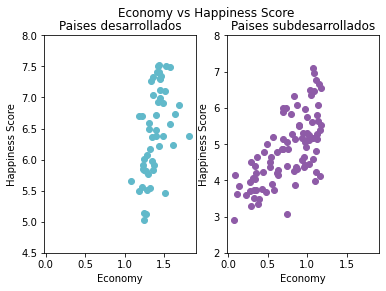

In [73]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharex=True)
fig.suptitle("Economy vs Happiness Score") 
ax2.scatter(data= df[df["Clasification"] == 0],x='Economía', y='Felicidad',color="#8E5BA7")
ax2.set_ylim((2,8))
ax1.set_ylim((4.5,8))
ax1.scatter(data=df[df["Clasification"] == 1],x='Economía', y='Felicidad',c="#61B9CA")
ax2.set_title("Paises subdesarrollados")
ax1.set_title("Paises desarrollados")
ax2.set_xlabel("Economy")
ax2.set_ylabel("Happiness Score")
ax1.set_xlabel("Economy")
ax1.set_ylabel("Happiness Score")

plt.show()

In [25]:
df["Clasificacion"]=0
df['Clasificacion'] = np.where((df['Clasification'] == 1) , "Desarrollado", "Subdesarrollado")

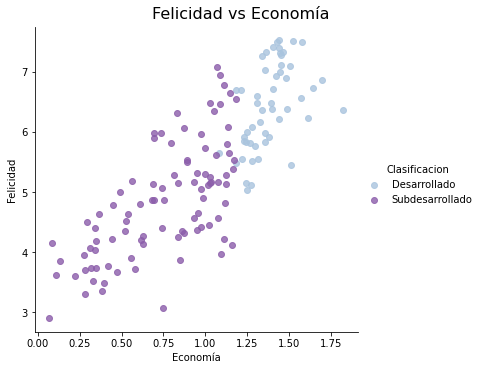

In [75]:

ax= sns.lmplot(x='Economía', y='Felicidad', hue='Clasificacion', 
           data=df, fit_reg=False, palette="BuPu")

plt.subplots_adjust(top=.925)
plt.suptitle("Felicidad vs Economía",size=16)
plt.show()

De acuerdo con las gráficas analizadas, podemos decir principalmente que en los países desarrollados y subdesarrollados ambos tienen una relación positiva de su felicidad con la economía, pero a simple vista no podemos concluir cuál de ellos tienen una mayor relación, por lo que revisaremos sus correlaciones.

- A continuación visualizaremos la correlación de la felicidad con cada una de sus variables para los paises desarrollados y subdesarrollados.

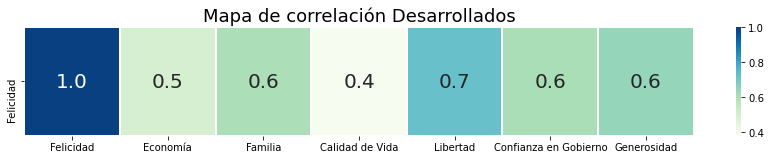

In [77]:
dc=df[df["Clasification"] == 1].corr()
dc=dc.drop(["Generosidad","Economía", "Familia","Calidad de Vida","Libertad","Confianza en Gobierno","Adj","Per_Capita","Clasification"])
dc=dc.drop(["Adj","Per_Capita","Clasification"],axis=1)
f,ax=plt.subplots(figsize = (15,2))
sns.heatmap(dc,annot= True,linewidths=1,fmt = ".1f",ax=ax,cmap="GnBu",annot_kws={"fontsize":20}) 
plt.yticks(rotation ='vertical')
plt.title('Mapa de correlación Desarrollados',size=18)
plt.savefig('graph.png')
plt.savefig("Ejemplo2.jpg")
plt.show()


Podemos observar que para los países desarrollados la variable con mayor relación a la felicidad es la libertad y la de menor relación es la de expectativa de vida. 

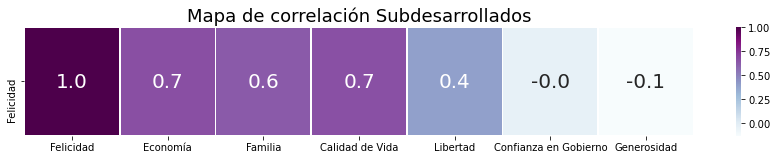

In [78]:
dp=df[df["Clasification"] == 0].corr()
dp=dp.drop(["Generosidad","Economía", "Familia","Calidad de Vida","Libertad","Confianza en Gobierno","Adj","Per_Capita","Clasification"])
dp=dp.drop(["Adj","Per_Capita","Clasification"],axis=1)

f,ax=plt.subplots(figsize = (15,2))
sns.heatmap(dp,annot= True,linewidths=0.5,fmt = ".1f",ax=ax,cmap="BuPu",annot_kws={"fontsize":20})
plt.yticks(rotation=90)
plt.title('Mapa de correlación Subdesarrollados',size=18)
plt.savefig('graph.png')
plt.show()

Podemos observar que para los países subdesarrollados la variable con mayor relación con la felicidad es la calidad de vida y la economía y la de menor relación es la generosidad, es decir, a mayor generosidad la felicidad es menor.

Una vez analizados los gráficos anteriores, podemos concluir que la felicidad está más relacionada con la economía para los países subdesarrollados. 

#### Objetivo secundario

- Factores que más influyen para determinar la felicidad.

Después de analizar las correlaciones obtenidas anteriormente, analizaremos la Felicidad vs Libertad, ya que, para los países desarrollados esta variable tiene mayor importancia. 


<function matplotlib.pyplot.show(*args, **kw)>

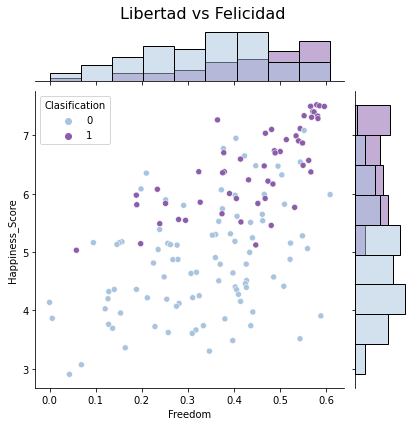

In [51]:
g = sns.JointGrid(data=df, x="Freedom", y="Happiness_Score", hue="Clasification", palette="BuPu")
g.plot(sns.scatterplot, sns.histplot)
plt.suptitle('Libertad vs Felicidad',size=16)
plt.subplots_adjust(top=.925)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

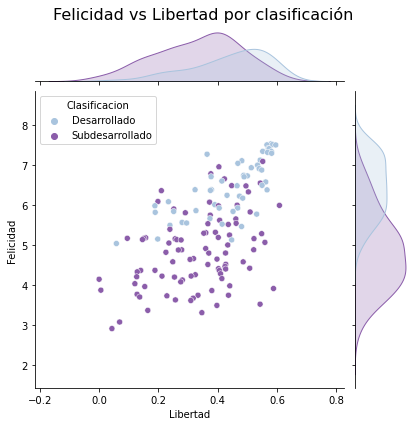

In [79]:

sns.jointplot(data=df, x="Libertad", y="Felicidad", hue="Clasificacion", palette="BuPu")
plt.suptitle('Felicidad vs Libertad por clasificación',size=16)
plt.subplots_adjust(top=.925)
plt.show

Con el gráfico anterior, podemos ver que los datos tanto en el diagrama de dispersión como en el histograma se concentran en los valores más altos y muestran una mayor relación, ya que, los datos están más cercanos unos de otros, mientras que, en los países subdesarrollados podemos notar que los datos están más dispersos en el gráfico de dispersión y los histogramas no muentran un incremento constante. 

Ahora analizaremos la Calidad de vida vs Felicidad, ya que, para los países subdesarrollados esta variable tiene mayor importancia. 

In [ ]:
g = sns.jointplot(x='Life_Expectancy', y='Happiness_Score', data=df[df["Clasification"] == 1],color="#61B9CA")
plt.suptitle('Calidad de vida vs Felicidad en países desarrollados',size=16)
plt.subplots_adjust(top=.925)
plt.show

g= sns.jointplot(x='Life_Expectancy', y='Happiness_Score', data=df[df["Clasification"] == 0],color="#8E5BA7")
plt.suptitle('Calidad de vida vs Felicidad en países subdesarrollados',size=16)
plt.subplots_adjust(top=.925)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

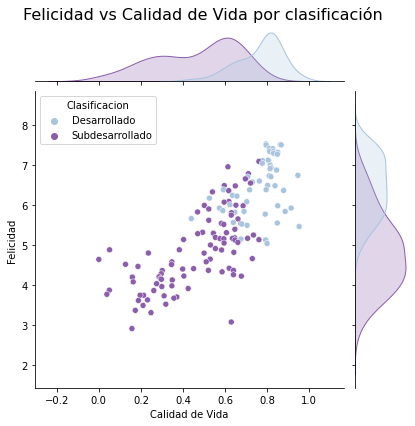

In [80]:
sns.jointplot(data=df, x="Calidad de Vida", y="Felicidad", hue="Clasificacion", palette="BuPu")
plt.suptitle('Felicidad vs Calidad de Vida por clasificación',size=16)
plt.subplots_adjust(top=.925)
plt.show

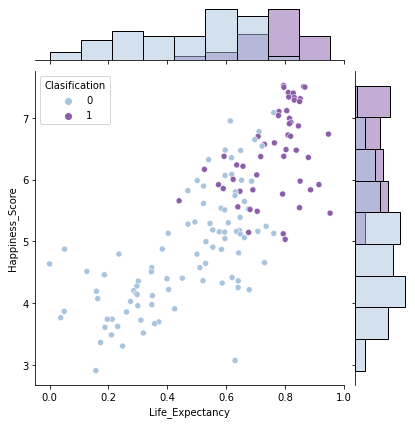

In [56]:
g = sns.JointGrid(data=df, x="Life_Expectancy", y="Happiness_Score", hue="Clasification", palette="BuPu")
g.plot(sns.scatterplot, sns.histplot)


Dada la gráfica podemos analizar una mayor dispersión en los datos de los países desarrollados, lo que indica una correlación positiva pero no muy fuerte, por otro lado, en los países subdesarrollados observamos una concentración de los datos más definida lo que indica una correlación más fuerte.

Para finalizar observaremos el siguiente gráfico, el cual, nos proporciona la puntuación de la felicidad para cada uno de los países.

In [ ]:
data_map = pd.merge(df_paises[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         df,left_on='CountryName',right_on='Country')

data_map['Happiness Score color'] = data_map['Happiness_Score'].apply(lambda x: int(x))
data_map['Happiness Score size'] = data_map['Happiness_Score'].apply(lambda x: int(x*3.5))
data_map['text'] = data_map['CountryName'] + ', ' + 'HS' + ' ' + data_map['Happiness_Score'].astype(str)
fig = go.Figure(data=go.Scattergeo(
        lon = data_map['CapitalLongitude'],
        lat = data_map['CapitalLatitude'],
        text = data_map['text'],
        mode = 'markers',
        marker = dict(
            size = data_map['Happiness Score size'],
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'GnBu',
            cmin = 0,
            color = data_map['Happiness Score color'],
            cmax = data_map['Happiness_Score'].max(),
            colorbar_title="HS"
        )))

fig.update_layout(
    title_text="World Happiness Score",geo = dict(
            showland = True,
            landcolor = '#D3C9DF'

        )
)

fig.show()

In [ ]:
data_map = pd.merge(df_paises[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         df,left_on='CountryName',right_on='Country')

data_map['Happiness Score color'] = data_map['Happiness_Score'].apply(lambda x: int(x))
data_map['Happiness Score size'] = data_map['Happiness_Score'].apply(lambda x: int(x*3.5))
data_map['text'] = data_map['CountryName'] + ', ' + 'HS' + ' ' + data_map['Happiness_Score'].astype(str)
data_map=data_map[data_map['Clasification']==1]
fig = go.Figure(data=go.Scattergeo(
        lon = data_map['CapitalLongitude'],
        lat = data_map['CapitalLatitude'],
        text = data_map['text'],
        mode = 'markers',
        marker = dict(
            size = data_map['Happiness Score size'],
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Purples',
            cmin = 0,
            color = data_map['Happiness Score color'],
            cmax = data_map['Happiness_Score'].max(),
            colorbar_title="HS"
        )))

fig.update_layout(
    title_text="World Happiness Score",geo = dict(
            showland = True,
            landcolor = '#D3C9DF'

        )
)


fig.show()

In [ ]:
data_map

### Conclusión final

Con la información anterior, podemos concluir, que contrario a nuestras expectativas los países subdesarrollados tiene una relación más fuerte entre el dinero y la felicidad. 
Además determinamos que la variable que más influencia tiene en la felicidad para los países desarrollados la libertad y para los subdesarrollados es la economía y la expectativa de vida. 

Por último, analizamos que a medida que un país va teniendo mayor nivel ecónomico , esta variable no se vuelve tan relevante y ahora los intereses de estos países están más enfocados hacia la parte humana, por otra parte, en los países subdesarrollados la calidad de vida y la economía son factores más relevantes para su felicidad, puesto que, a estos se determinan como un ideal. 
